# Text Summarization 





## Implementation


### 1. Importing important libraries


In [ ]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


### 2.  Function to read the document from user


In [ ]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

### 3. Function to tokenize the document

In [ ]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### 4. Read the document

In [ ]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: text.txt
You have asked for the document text.txt
1
<class 'str'>
The length of the file is: 4154


### 5. Generate a list of sentences in the document

In [ ]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 272
The size of the item 0 in Bytes is: 263


In [ ]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

<class 'list'>


In [ ]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 27


In [ ]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

AI, ChatGPT Poised to Potentially Transform Healthcare, Science
A new report from Accenture states that ChatGPT is continuing to grow in application, finding new ways to transform healthcare, business, and science.
AI chatbot.
April 12, 2023 - According to a new report from Accenture, the growth of artificial intelligence (AI) and ChatGPT is leading to transformations in science, business, healthcare, and society, positively impacting human creativity and productivity.
With advancements in modern technology, researchers are continuing to develop various types of AI, using it to transform different systems and processes.
According to the report, 98 percent of global executives agreed that in the next three to five years, their organizations' strategies would involve AI foundation models.
Amid the growing prominence of AI, ChatGPT is a service that continues to gain recognition for performing various types of tasks within several industries, one of which is healthcare.
ChatGPT is a natur

### 6. Generate term-document matrix (TD matrix) of the data 

In [ ]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names_out()))


Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am' 'are' 'ashish' 'bad' 'good' 'is' 'not' 'you']


In [ ]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names_out())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <27x290 sparse matrix of type '<class 'numpy.int64'>'
	with 542 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['100' '12' '2023' '42' '80' '96' '98' 'abilities' 'ability' 'about'
 'accenture' 'according' 'accuracy' 'accurate' 'advancements' 'agreed'
 'agreement' 'ai' 'allow' 'along' 'also' 'amid' 'an' 'and' 'another'
 'ansiblehealth' 'answer' 'answering' 'answers' 'application'
 'appropriate' 'april' 'architecture' 'are' 'artificial' 'as' 'assessment'
 'at' 'authors' 'based' 'be' 'best' 'both' 'brings' 'building' 'business'
 'by' 'can' 'cancer' 'capable' 'cbme' 'certain' 'chatbot' 'chatgpt'
 'clinician' 'common' 'companies' 'company' 'comparing' 'competency'
 'complex' 'conclude' 'concluded' 'content' 'continues' 'continuing'
 'controls' 'could' 'creativity' 'cureus' 'curriculum' 'data' 'deeper'
 'defined' 'delivered' 'design' 'despite

In [ ]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21144896 0.18788924 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.22085772 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <290x27 sparse matrix of type '<class 'numpy.float64'>'
	with 542 stored elements in Compressed Sparse Column format>>


Number of edges 346
Number of vertices 27


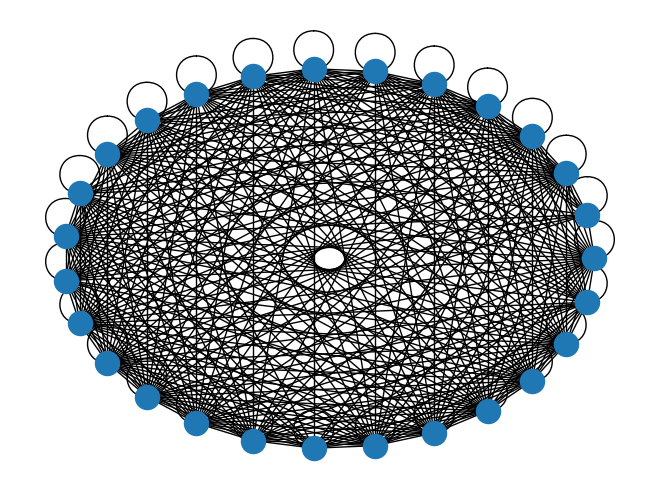

The memory used by the graph in Bytes is: 48


In [ ]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_array(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

### 8. Getting the rank of every sentence using textrank

In [ ]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 1176
0 0.04522617030342497
1 0.026207439907190395
2 0.044924107142187086
3 0.04075087523123971
4 0.0388104750917358
5 0.03958034954389573
6 0.03059371199048221
7 0.037281221941050734
8 0.031425655667803476
9 0.04011424612404019
10 0.03113620030306166
11 0.03245840109214383
12 0.02703043932512552
13 0.033337332634863125
14 0.03051931473592139
15 0.036218445065538826
16 0.04576856354085176
17 0.04505974803441932
18 0.05301016118404853
19 0.03732964045634368
20 0.031164353979631437
21 0.043366043198300154
22 0.038982431010148484
23 0.03276304625313785
24 0.03840694958305775
25 0.036905312814960615
26 0.031629363845395615


### 9. Finding important sentences and generating summary

In [ ]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [ ]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.05301016118404853
0.026207439907190395


In [ ]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


27


In [ ]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [ ]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [ ]:
model = sentence_list

### 10. Writing the summary to a new file

In [ ]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('sum.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close


Researchers noted that a major reason for this study was due to limited evidence related to the abilities of ChatGPT to answer first- and second-order knowledge questions. The use of AI and ChatGPT in healthcare continues to grow as researchers discover the various ways it can provide support. AI, ChatGPT Poised to Potentially Transform Healthcare, Science
A new report from Accenture states that ChatGPT is continuing to grow in application, finding new ways to transform healthcare, business, and science. For example, researchers wrote in Cureus in March that ChatGPT could answer first-order and second-order questions in line with the competency-based medical education (CBME) curriculum for microbiology. April 12, 2023 - According to a new report from Accenture, the growth of artificial intelligence (AI) and ChatGPT is leading to transformations in science, business, healthcare, and society, positively impacting human creativity and productivity. Following reviews for content validity a

<function TextIOWrapper.close()>

In [ ]:
for lines in sentence_list:
    print(lines)

Researchers noted that a major reason for this study was due to limited evidence related to the abilities of ChatGPT to answer first- and second-order knowledge questions.
The use of AI and ChatGPT in healthcare continues to grow as researchers discover the various ways it can provide support.
AI, ChatGPT Poised to Potentially Transform Healthcare, Science
A new report from Accenture states that ChatGPT is continuing to grow in application, finding new ways to transform healthcare, business, and science.
For example, researchers wrote in Cureus in March that ChatGPT could answer first-order and second-order questions in line with the competency-based medical education (CBME) curriculum for microbiology.
April 12, 2023 - According to a new report from Accenture, the growth of artificial intelligence (AI) and ChatGPT is leading to transformations in science, business, healthcare, and society, positively impacting human creativity and productivity.
Following reviews for content validity a